In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [5]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W

In [6]:
p=400

#HERE START THE ADAPTIVE GRID
alpha=0.998
wait_time=int(1/(1-alpha))
n_wait=10
N_grid=wait_time*n_wait
n=N_grid/p
L=T*n

t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

st=int(p/2)
fn=N_grid-1-st

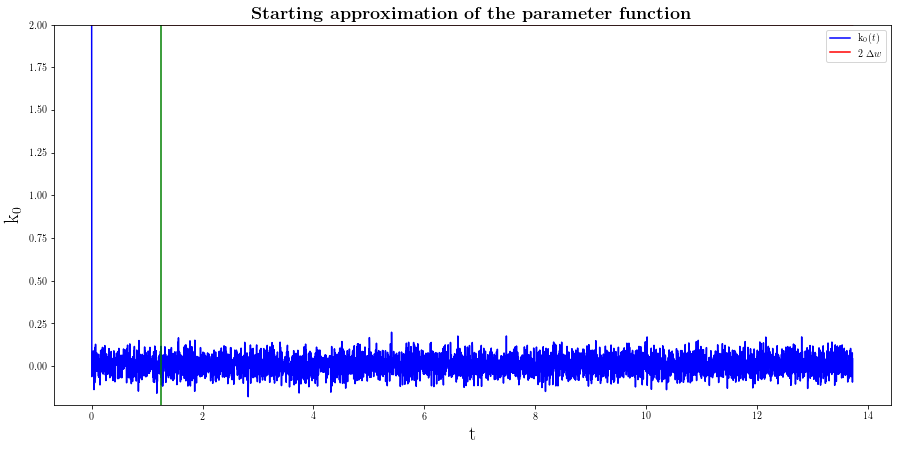

ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ
STD: 0.0568313404405 0.79096499646
MEAN: 0.00705260623873 3.0


In [10]:
M=2*dw

move=20

t_t=np.linspace(0, L+wait_time/p, N_grid+wait_time)
k0_t=np.zeros(N_grid+wait_time, np.dtype(float))


sigma=.05
mu=(2*dw+sigma*move)*(1-alpha)
np.random.seed
xi=sigma*np.random.randn(N_grid+wait_time-1)+mu


k0_t=[2*dw if i==0 else alpha*k0_t[i-1]+xi[i-1] for i in range(N_grid+wait_time)]
#from ipywidgets import FloatProgress
#from IPython.display import display as display_widget
#f = FloatProgress(min=0, max=N_grid+wait_time)
#display_widget(f)



#for i in range(N_grid+wait_time):
#    if i==0:
#        k0_t[i]=2*dw
#    else:
        #dif=np.random.normal(mu, sigma)
#        k0_t[i]=alpha*k0_t[i-1]+xi[i-1]
        #f.value=i
        

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.ylim((min(k0_t)-0.05, max(k0_t)))
plt.plot(t_t, k0_t, 'b')
plt.plot(t_t, [2*dw]*(N_grid+wait_time), 'r')
plt.plot(t_t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

k0=np.zeros(N_grid, np.dtype(float))
k0=k0_t[int(1/(1-alpha)):]
if k0[0]<2*dw:
    k0[0]=2*dw+sigma*move
    print("ЭТА ЗАРАЗА СЛОМАЛАСЬ ОПЯТЬ")
    
print("STD:", np.std(k0_t), np.sqrt(1/(1-alpha*alpha))*sigma)
print("MEAN:", np.mean(k0), (2*dw+sigma*move))